In [1]:
import csv
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from xgbse.converters import (
    convert_data_to_xgb_format,
    convert_to_structured
)

data = pd.read_csv('../cohort.csv')

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [53]:
# splitting
X = data.drop(['time', 'event', 'cldl'], axis=1)
y = data.head(1000)
y = convert_to_structured(y['time'], y['event'])
X = X.head(1000)

# splitting between train, and validation 
(X_train, X_valid,
 y_train, y_valid) = \
train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X_train

In [3]:
random_state = 20
model = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

0.7646822204344328

In [4]:
feature_names = [i for i in X.columns ]
explainer = shap.Explainer(model.predict, X_valid, feature_names=feature_names)
shaps = explainer(X_valid)

Permutation explainer: 201it [22:37,  6.82s/it]                                 


In [5]:
X_test_sorted = X_valid
X_test_sel = pd.concat((X_test_sorted.head(6), X_test_sorted.tail(0)))

X_test_sel

age  men  smoker  p.dm    pas   ct  chdl   tg  htn_med  charlson  \
890   84    0       0     0   80.0  281    58  173        1         0   
694   75    0       0     1  150.0  206    58  139        1         2   
798   94    0       0     0  120.0  264    79   93        1         0   
147   79    0       0     0  146.0  224    54  162        1         0   
858   81    1       0     0  146.0  229    50  125        1         0   
446   76    0       0     0  152.0  270    69   77        0         0   

       ckd.epi  c10  hematocrit  
890  59.513402    1        40.4  
694  82.889366    1        40.1  
798  45.954334    0        39.5  
147  51.660767    1        42.1  
858  78.760124    1        46.0  
446  66.552722    1        38.4

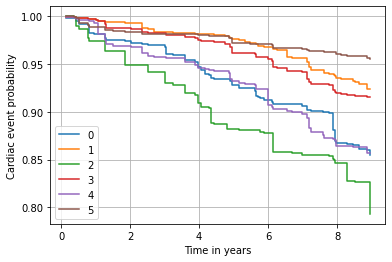

In [6]:
surv = model.predict_survival_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(model.event_times_, s, where="post", label=str(i))
plt.ylabel("Cardiac event probability")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)



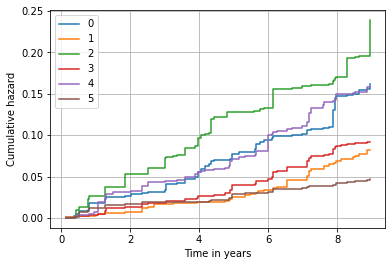

In [7]:
surv = model.predict_cumulative_hazard_function(X_test_sel, return_array=True)

for i, s in enumerate(surv):
    plt.step(model.event_times_, s, where="post", label=str(i))
plt.ylabel("Cumulative hazard")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)

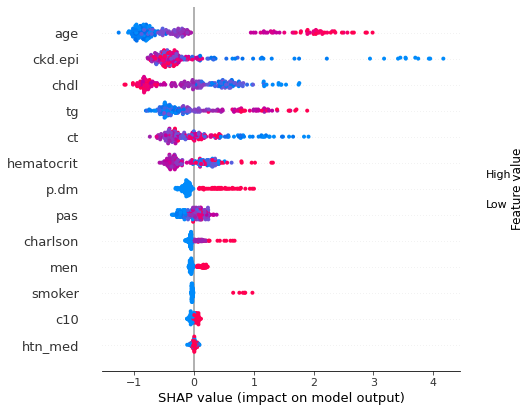

In [8]:
shap.summary_plot(shaps, X_valid)
# C-stat = 0.76 amb 1000 individus
# C-stat = 0.66 amb 5000 individus

In [9]:
shap.initjs()
shap.plots.force(shaps[0])

In [10]:
shap.plots.force(shaps[1])

In [11]:
shap.plots.force(shaps[2])

In [12]:
shap.plots.force(shaps[3])

In [13]:
shap.plots.force(shaps[4])

In [14]:
shap.plots.force(shaps[5])

In [15]:
X[-1:]

age  men  smoker  p.dm    pas   ct  chdl  tg  htn_med  charlson  \
999   75    0       0     0  130.0  173    60  73        1         1   

       ckd.epi  c10  hematocrit  
999  69.997594    1        40.8

In [16]:
df2 = {'age': 80, 'men': 0, 'smoker': 0, 'p.dm': 1, 'pas': 130.0, 'ct': 180, 'chdl': 70, 'tg':80, 'htn_med':1, 'charlson':5, 'ckd.epi':70, 'c10':0, 'hematocrit':41}

X = X.append(df2, ignore_index = True)

X[-1:]

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age  men  smoker  p.dm    pas     ct  chdl    tg  htn_med  charlson  \
1000  80.0  0.0     0.0   1.0  130.0  180.0  70.0  80.0      1.0       5.0   

      ckd.epi  c10  hematocrit  
1000     70.0  0.0        41.0

In [17]:
# explainer = shap.Explainer(model.predict, X_valid, feature_names=feature_names)
shapvals = explainer(X[-1:])

In [18]:
shap.plots.force(shapvals[0])

In [71]:
age = input('age:')
men = input('sex (1 for men, 0 for women):')
smoker = input('smoker (1 is smoker, 0 not smoker):')
pdm = input ('diabetes (1 is diabetic, 0 is not):')
pas = input('pas:')
ct = input('ct:')
chdl = input('chdl:')
tg = input('tg:')
htn_med=input('hypertensive treatment (1 is being treated, 0 not):')
charlson=input('charlson:')
ckdepi=input('renal function:')
c10 = input('lipid-lowering treatment (1 is being treated, 0 not):')
hematocrit = input('hematocrit:')

df2 = {'age': float(age), 'men': float(men), 'smoker': float(smoker), 'p.dm': float(pdm), 'pas': float(pas), 'ct': float(ct), 'chdl': float(chdl), 'tg':float(tg), 'htn_med':float(htn_med), 'charlson':float(charlson), 'ckd.epi':float(ckdepi), 'c10':float(c10), 'hematocrit':float(hematocrit)}

X = X.append(df2, ignore_index = True)

shapvals = explainer(X[-1:])

shap.plots.force(shapvals[0])

age:100
sex (1 for men, 0 for women):1
smoker (1 is smoker, 0 not smoker):1
diabetes (1 is diabetic, 0 is not):1
pas:100
ct:100
chdl:100
tg:100
hypertensive treatment (1 is being treated, 0 not):1
charlson:1
renal function:100
lipid-lowering treatment (1 is being treated, 0 not):1
hematocrit:100


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
